# Kalorimetrie Laborversuch

Author: Ole Quiring

Datum: 12.12.23

Gruppe: 48

## Forschungsfrage

Wie viel besser lassen sich Thermische Konstanten in einer professionellem Forschungsumgebung bestimmen?


## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


Versuchsaufbau
<img src="20231128_145755.jpg" width="800">
Probe-015
<img src="20231128_150132.jpg" width="800">
Probe-002
<img src="20231128_150137.jpg" width="800">
Probe-025
<img src="20231128_150152.jpg" width="800">

## Versuchsauswertung

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [48]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Konstante/Konstante.h5"
group_path = "/RawData/"
# DONE #

In [49]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,group_path)

# DONE #


In [50]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [51]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.
mean=[]
std=[]
for j in index_calorimeter:
    mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_calorimeter[0])
    std.append(mean_std_calorimeter[1])
for j in index_environment:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
allindex=index_calorimeter+index_environment

meanandstd=[[mean[0],mean[1],mean[2],mean[3]],[std[0],std[1],std[2],std[3]]]


# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

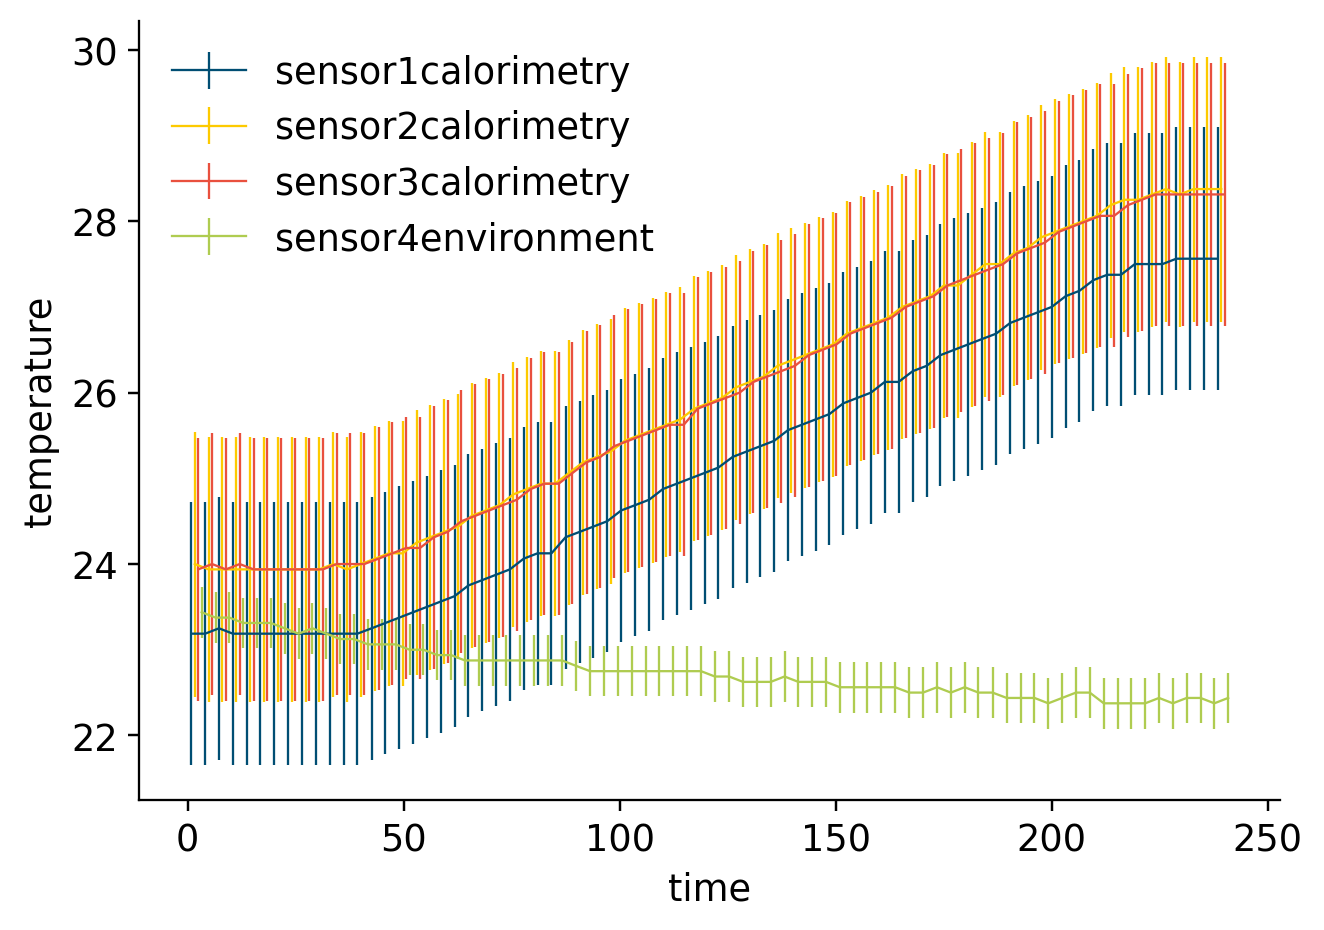

In [52]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
legend=["sensor1calorimetry","sensor2calorimetry","sensor3calorimetry","sensor4environment"]
x_label="time"
y_label="temperature"
data=[[data_dict["temperature"][0],std[0]],[data_dict["temperature"][1],std[1]],[data_dict["temperature"][2],std[2]],[data_dict["temperature"][3],std[3]]]
time=[data_dict["time"][0],data_dict["time"][1],data_dict["time"][2],data_dict["time"][3]]


utility.plot_temp_over_time(data,time,legend,x_label,y_label)

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [53]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
import json
with open("data/Konstante/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json", 'r') as json_file:
    data = json.load(json_file)

water_mass = data["calorimeter"]["medium"]["mass"]["value"]


# DONE #

In [54]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

with h5.File(datafile_path_const) as data:
    heatercurrent = data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["current"]
    heatervoltage = data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["voltage"]
    heaterheat_time = data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["heat_time"]
 

    current = heatercurrent[()]

    heat_time = heaterheat_time[()]
    voltage = heatervoltage[()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [55]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
data=[[data_dict["temperature"][0]],[data_dict["temperature"][1]],[data_dict["temperature"][2]]]

temperature_end, temperature_start = utility.get_start_end_temperature(data) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [56]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [57]:
print(calorimeter_const)
ergebnis=2057.1428571428573

2057.1428571428573


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [58]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/Probe-002/Probe-002.h5"
group_path = "/RawData/"
# DONE #

In [59]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,group_path)


# DONE #

In [60]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [61]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
for j in index_calorimeter:
    mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_calorimeter[0])
    std.append(mean_std_calorimeter[1])
for j in index_env:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
for j in index_bath:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
allindex=index_calorimeter+index_env+index_bath

meanandstd=[[mean[0],mean[1],mean[2],mean[3]],[std[0],std[1],std[2],std[3]]]

# DONE #

#### (iii) Daten ploten

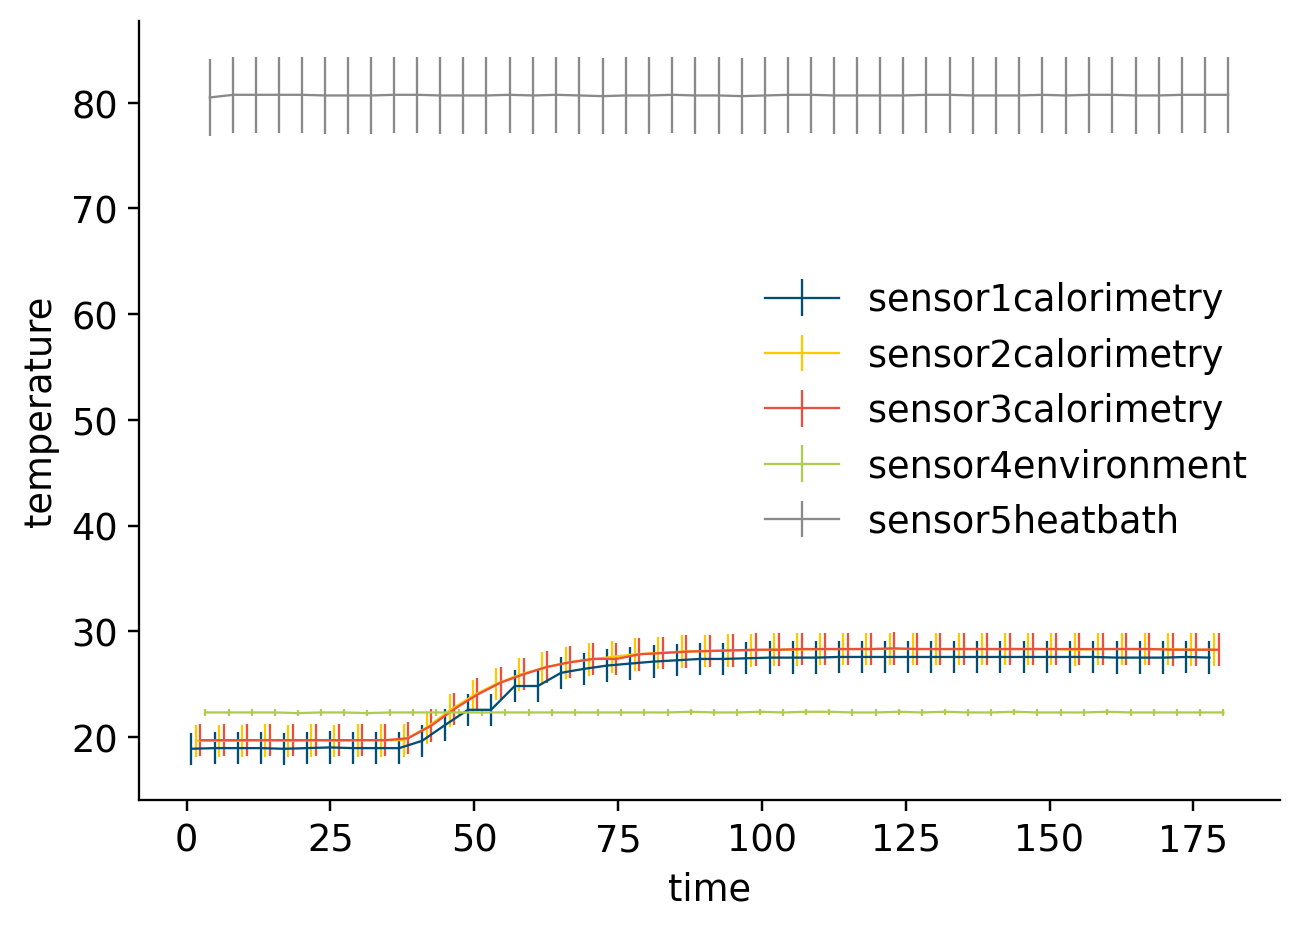

In [62]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
legend=["sensor1calorimetry","sensor2calorimetry","sensor3calorimetry","sensor4environment","sensor5heatbath"]
x_label="time"
y_label="temperature"
data=[[data_dict["temperature"][0],std[0]],[data_dict["temperature"][1],std[1]],[data_dict["temperature"][2],std[2]],[data_dict["temperature"][3],std[3]],[data_dict["temperature"][4],std[4]]]
time=[data_dict["time"][0],data_dict["time"][1],data_dict["time"][2],data_dict["time"][3],data_dict["time"][4]]

utility.plot_temp_over_time(data,time,legend,x_label,y_label)

# DONE #

#### (iv) Metadaten auslesen

In [63]:
# TODO: Read mass of the sample from the metadata of the experiment.
import json
with open("data/Probe-002/probe_PDC002_1ee57b2d-d72d-6d50-b383-9f0e278e8f09.json", 'r') as json_file:
    data = json.load(json_file)

 
sample_mass = data["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [64]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
data=[[data_dict["temperature"][0]],[data_dict["temperature"][1]],[data_dict["temperature"][2]]]

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data) 

# DONE #

In [65]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
x=0
for i in range(10):
    x=x+data_dict["temperature"][4][i]

temperature_start_sample = x/10


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [66]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_sample))/(sample_mass*(temperature_start_water-temperature_mix))
print(sample_heat_capa)
# DONE #

20.033974194350208


#### (Vii) Ergebnis

In [67]:
print(sample_heat_capa)
ergebnis1=20.033974194350208

20.033974194350208


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [68]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/Probe-015/Probe-015.h5"
group_path = "/RawData/"

# DONE #

In [69]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,group_path)

# DONE #

In [70]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [71]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

for j in index_calorimeter:
    mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_calorimeter[0])
    std.append(mean_std_calorimeter[1])
for j in index_env:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
for j in index_bath:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
allindex=index_calorimeter+index_env+index_bath

meanandstd=[[mean[0],mean[1],mean[2],mean[3]],[std[0],std[1],std[2],std[3]]]

# DONE #

#### (iii) Daten ploten

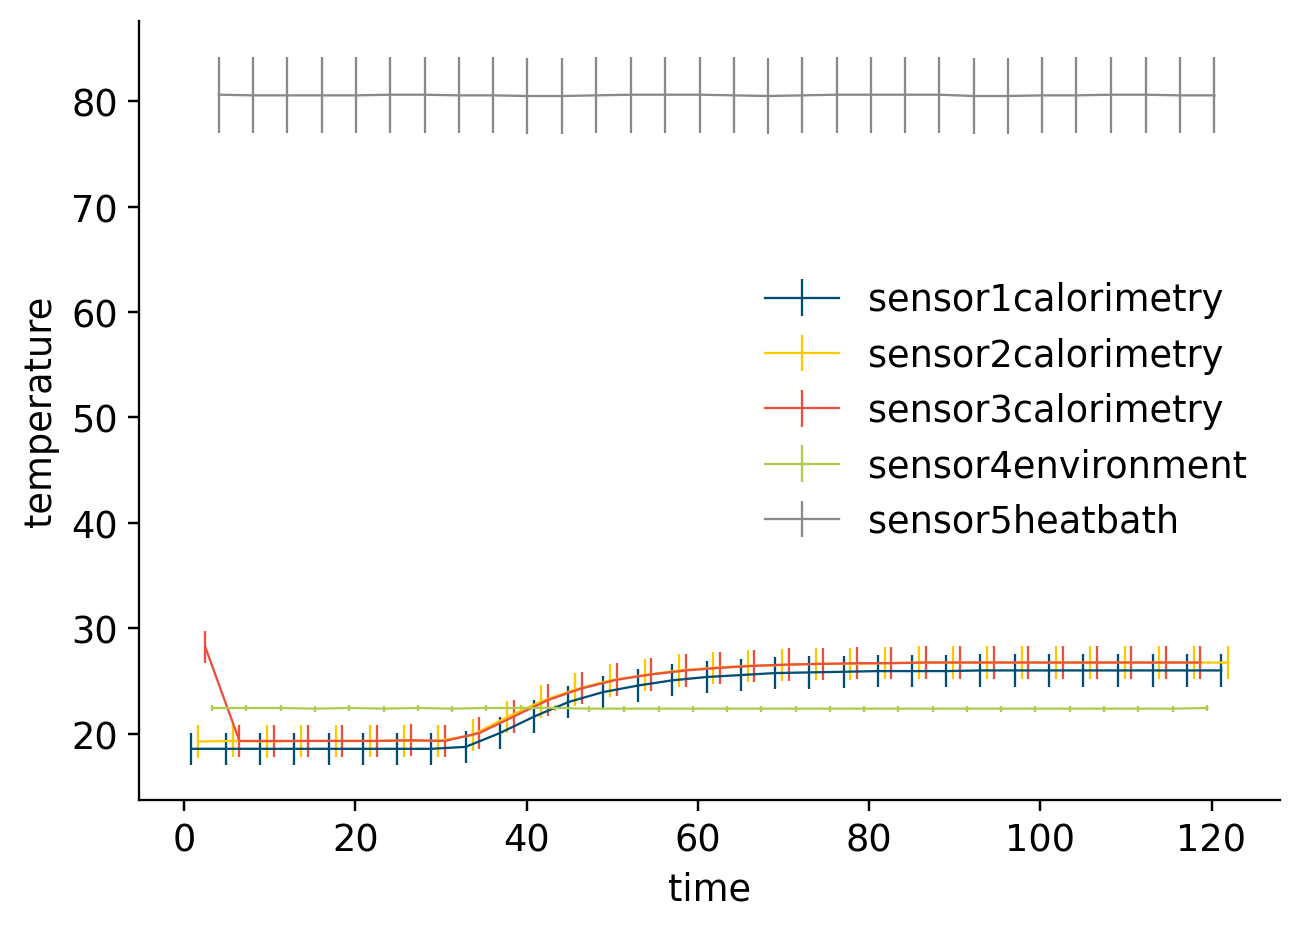

In [72]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

legend=["sensor1calorimetry","sensor2calorimetry","sensor3calorimetry","sensor4environment","sensor5heatbath"]
x_label="time"
y_label="temperature"
data=[[data_dict["temperature"][0],std[0]],[data_dict["temperature"][1],std[1]],[data_dict["temperature"][2],std[2]],[data_dict["temperature"][3],std[3]],[data_dict["temperature"][4],std[4]]]
time=[data_dict["time"][0],data_dict["time"][1],data_dict["time"][2],data_dict["time"][3],data_dict["time"][4]]

utility.plot_temp_over_time(data,time,legend,x_label,y_label)

# DONE #

#### (iv) Metadaten auslesen

In [73]:
# TODO: Read mass of the sample from the metadata of the experiment.
import json
with open("data/Probe-015/probe_PDC015_1ee57b3b-1882-62e4-8374-424a3fe06b1b.json", 'r') as json_file:
    data = json.load(json_file)


sample_mass = data["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [74]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
data=[[data_dict["temperature"][0]],[data_dict["temperature"][1]],[data_dict["temperature"][2]]]

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data) 

# DONE #

In [75]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.
x=0
for i in range(10):
    x=x+data_dict["temperature"][4][i]

temperature_start_sample = x/10
# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [76]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_sample))/(sample_mass*(temperature_start_water-temperature_mix))
print(sample_heat_capa)

# DONE #

36.629759209713924


#### (Vii) Ergebnis

In [77]:
sample_heat_capa
ergebnis2=36.629759209713924

36.629759209713924

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [78]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/Probe-025/Probe-025.h5"
group_path = "/RawData/"

# DONE #

In [79]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,group_path)

# DONE #

In [80]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [81]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

for j in index_calorimeter:
    mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_calorimeter[0])
    std.append(mean_std_calorimeter[1])
for j in index_env:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
for j in index_bath:
    mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][j])
    mean.append(mean_std_environment[0])
    std.append(mean_std_environment[1])
allindex=index_calorimeter+index_env+index_bath

meanandstd=[[mean[0],mean[1],mean[2],mean[3]],[std[0],std[1],std[2],std[3]]]
# DONE #

#### (iii) Daten ploten

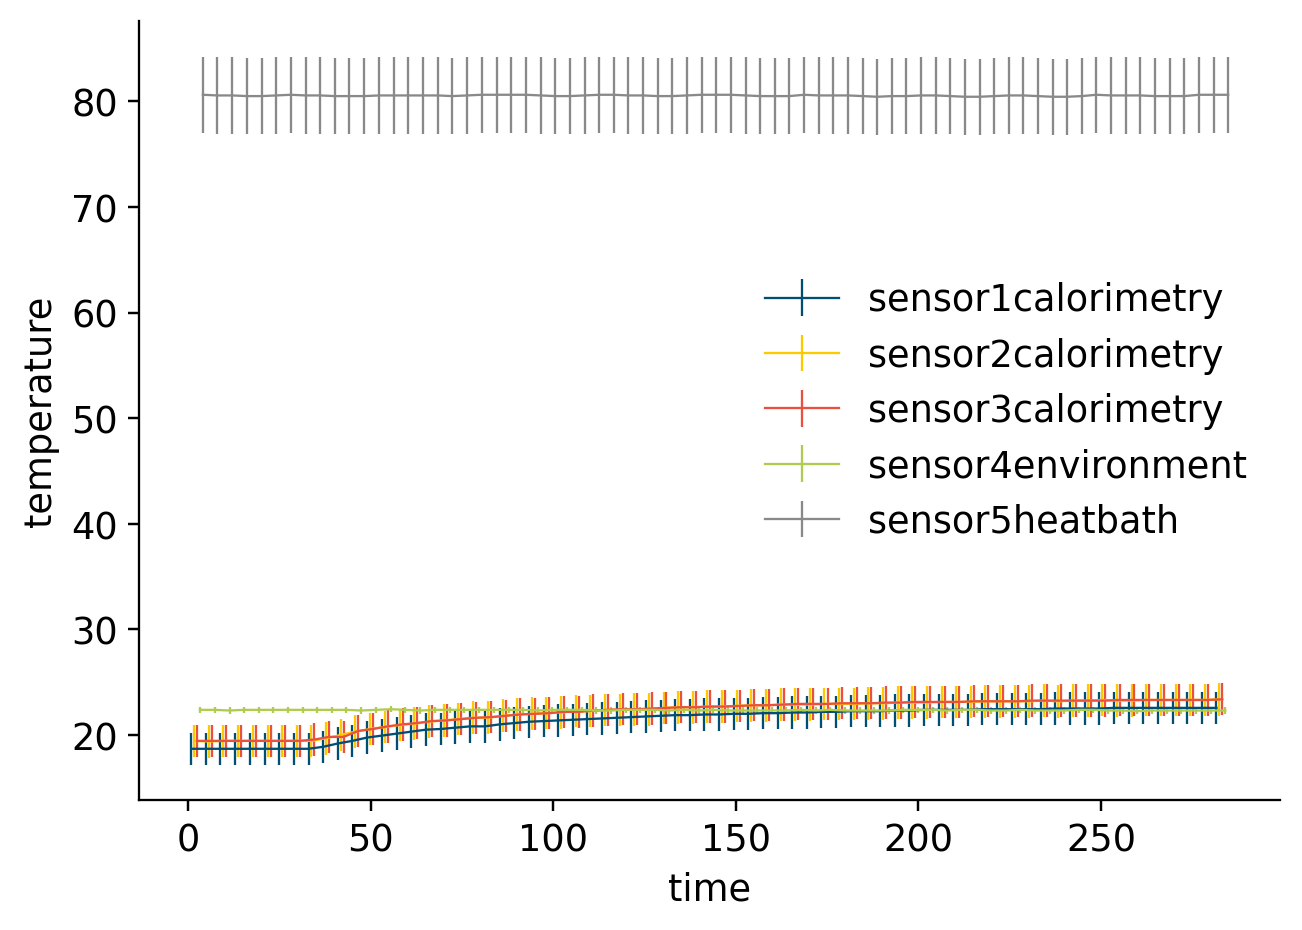

In [82]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
legend=["sensor1calorimetry","sensor2calorimetry","sensor3calorimetry","sensor4environment","sensor5heatbath"]
x_label="time"
y_label="temperature"
data=[[data_dict["temperature"][0],std[0]],[data_dict["temperature"][1],std[1]],[data_dict["temperature"][2],std[2]],[data_dict["temperature"][3],std[3]],[data_dict["temperature"][4],std[4]]]
time=[data_dict["time"][0],data_dict["time"][1],data_dict["time"][2],data_dict["time"][3],data_dict["time"][4]]

utility.plot_temp_over_time(data,time,legend,x_label,y_label)
# DONE #

#### (iv) Metadaten auslesen

In [83]:
# TODO: Read mass of the sample from the metadata of the experiment.

import json
with open("data/Probe-025/probe_PDC025_1ee7d446-f66f-659b-997e-0db42fc92959.json", 'r') as json_file:
    data = json.load(json_file)

 
sample_mass = data["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [84]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

data=[[data_dict["temperature"][0]],[data_dict["temperature"][1]],[data_dict["temperature"][2]]]

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data) 

# DONE #

In [85]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.
x=0
for i in range(10):
    x=x+data_dict["temperature"][4][i]

temperature_start_sample = x/10
# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [86]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_sample))/(sample_mass*(temperature_start_water-temperature_mix))
print(sample_heat_capa)

# DONE #

363.5595268612443


#### (Vii) Ergebnis

In [87]:
sample_heat_capa
ergebnis3=363.5595268612443

363.5595268612443

## Diskussion
Leider sind die berechneten Wärmekapazitäten der Stoffe überdurchschnittlich hoch, jedoch kann man dies auf Ungenauigkeiten bei sowohl der berechnung also auch der messung und auf viele weitere Faktoren rückführen. Die Wärmekapazitäten liessens sich dennoch viel besser im Labor erfassen als im Küchentischversuch, was ein gutes Ergebnis ist. Die von der Probe kommende Wärme erhitzt das vorher kühle Wasser, was die errechnung ermöglich,jedoch aber auch Ungenauigkeit erhöht. Als weitere Fehlerquellen kann man annehemn dass die Umgebung auch Wärmeenergie aus dem Versuch entzieht oder dass das Glas kein adiabates Versuchsklime herstellen kann.

## Fazit
Es war ein spannender Versuch mit einblicken in die Wärmespeicherung und übertragung verschiedener Werkstoffe, jedoch war die sicherung eines guten ergebnisses nur schwer realisierbar.